<h2>Анализ данных популярного интернет-магазина «Стримчик»<a class="tocSkip"><.h2>

Интернет-магазина "Стримчик" продает видеоигры по всему миру, из открытых источников были получены данные о продажах до 2016 года. На основе анализа этих данных планируется сделать выводы полезные для бизнеса, а также сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В процессе выполнения проекта планируются следующие стадии: осмотрр и подготовка данных, предобработка, исследовательский анализ, составление портрета каждого региона и проверка нескольких гипотез.

Описание данных:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger

<h3>1. Ознакомление с данными<a class="tocSkip"><.h3>

In [2]:
games_data = pd.read_csv('/datasets/games.csv')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Огромное количество пропусков в столбцах Critic_Score, User_Score и Rating.

In [5]:
games_data[games_data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
games_data[games_data['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
games_data[games_data['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
games_data[games_data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
games_data.duplicated().sum()

0

После данного этапа можно выделить некоторые наблюдения. В нашем датасете 11 столбцов с информацией по продажам видеоигр:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

Просмотрев пропуски в каждом столбце, можно сделать вывод, что заменить их на среднее, либо на какое-то другое значение нельзя, потому что это отразиться на результатах исследования. Но в глаза бросился неправильный формат данных в столбце Year_of_Release, на этапе предобработки данных следует заменить тип данных на int.

Также датасет был проверен на наличие дубликатов и можно сделать вывод, что явных дубликатов в датасете нет.

<h3>2. Предобработка данных<a class="tocSkip"><.h3>

Приведем названия столбцов к нижнему регистру

In [10]:
 games_data.columns = games_data.columns.str.lower()

In [11]:
#Заменим тип данных в столбце с годами релиза
games_data['year_of_release'] = games_data['year_of_release'].astype('Int64')

In [12]:
#Рассмотрим встречающуюся аббревиатуру tbd в столбце с оценкой пользователей
games_data[games_data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Оказывается tbd это аббревиатура означающая To Be Determind. Она пишется в случаях, когда игра не набрала нужного количества отзывов, а значит для нас это то же самое, что и NaN. Заменим все tbd на NaN и изменим тип данных этого столбца с object на float.

In [13]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.NaN)
games_data['user_score'] = games_data['user_score'].astype('float')
games_data[games_data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Посчитаем суммарные продажи во всех регионах.

In [14]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [15]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


Поиск неявных дубликатов совпадающих по названию, платформе и году релиза одновременно.

In [16]:
games_date_part = games_data.loc[:, 'name':'year_of_release']
games_date_part.drop_duplicates()
games_date_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16713 non-null  object
 1   platform         16715 non-null  object
 2   year_of_release  16446 non-null  Int64 
dtypes: Int64(1), object(2)
memory usage: 408.2+ KB


В результате данного этапа были выполнены следующие действия:

1) Все столбцы приведены к нижнему регистру.

2) Тип данных в столбцах с годом релиза был заменен на int.

3) Рассмотрена аббревиатура tbd, выяснено, что она обозначет To Be Determind и пишется в случаях когда не набрано нужное количество отзывов. Данная аббревиатура была заменена на NaN, потому что для нас она несет ровно ту же информацию.

4) Создан столбец с суммарными продажами во всех регионах. 

5) По характеры пропусков можно сделать следующие выводы. В столбцах critic_score и user_score пропуски связаны либо с банальным их отсутсвием, либо с тем, что игра выпущена во времена, когда сервисы с отзывами об играх не были так распространены. примерно тоже самое касается и столбца raiting в котором записан рейтинг ESRB, который используется для возрастных ограничений игры. Для заполнения пропусков в данных столбцах у нас недостаточно данных.

<h3>3. Исследовательский анализ данных<a class="tocSkip"><.h3>

Text(0, 0.5, 'Количество выпущенных игр')

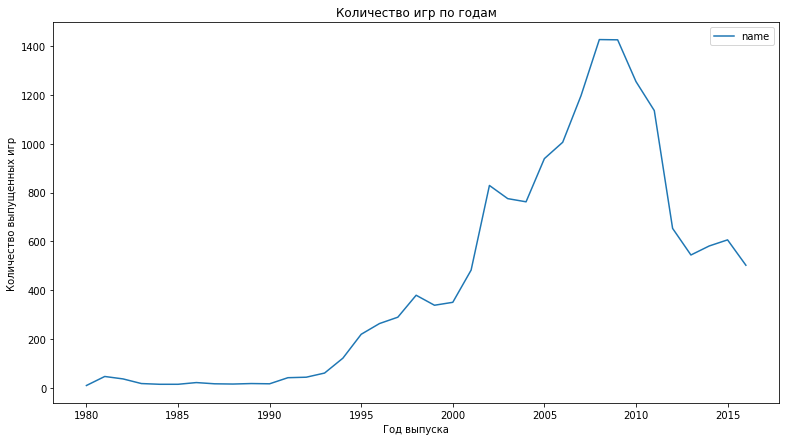

In [17]:
games_by_each_year = games_data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(13,7))
sns.lineplot(data=games_by_each_year)
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

Из графика видно что начало стремительного роста количества выпущенных игр пришлось на 1993 год, явный пик можно увидеть в 2008-2009 годах после чего количество пошло на спад.

Text(0, 0.5, 'Количество продаж')

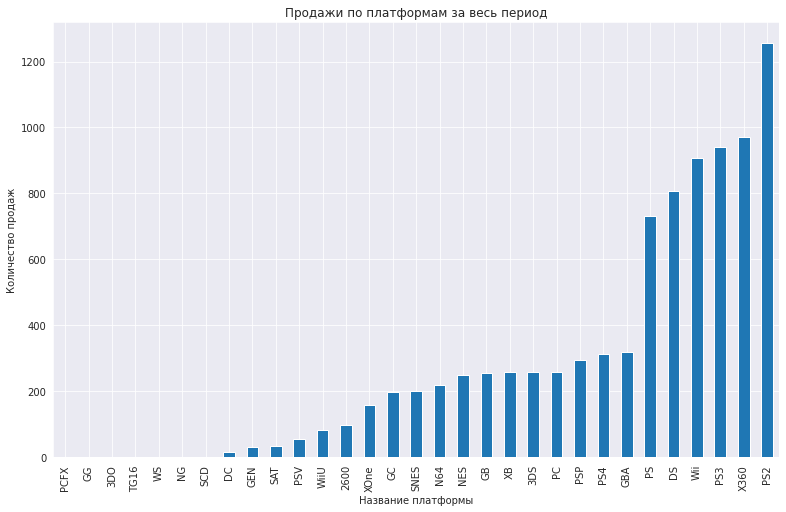

In [18]:
sales_pivot_table = games_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales')
plt.figure(figsize=(13,8))
sales_pivot_table['total_sales'].plot(kind='bar', title='Продажи по платформам за весь период')
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самыми популярными платформами являются PS2, X360, PS3, WII, DS, PS. Но это данные за все годы, они могут быть не слишком актуальны сейчас.

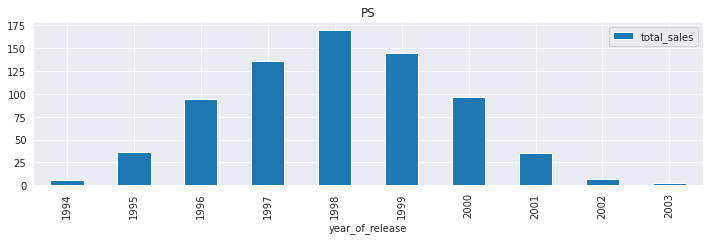

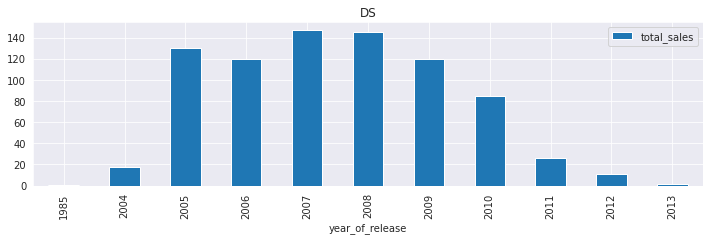

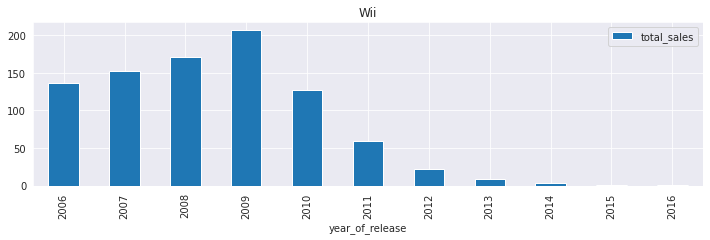

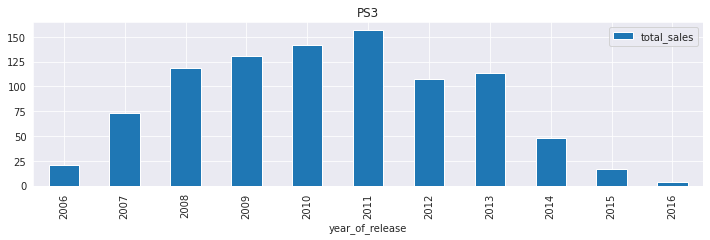

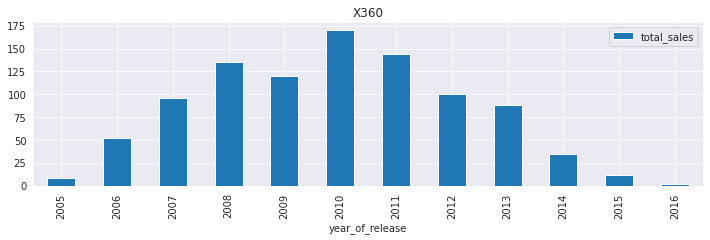

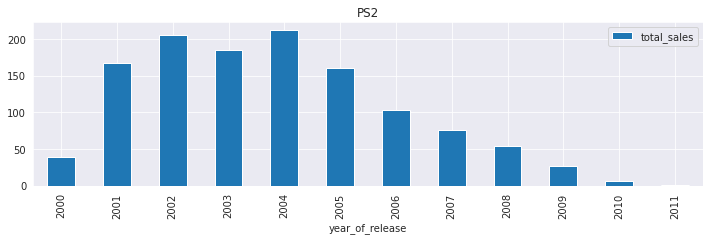

In [19]:
platform_grouped = sales_pivot_table[sales_pivot_table['total_sales'] > 600].reset_index()
platforms_list = platform_grouped['platform'].unique()
for platform in platforms_list:
    games_data[games_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(12,3), title=platform)

Исходя из полученных графиков средний период "жизни" платфомы 7-10 лет. 

Теперь следует определить, что мы будем считать **актуальным периодом**. Мне кажется, что следует брать года после 2012, потому что, как было отмечено ранее, именно в эти года пошел спад количества выпущенных игр, а значит сменилась реальность, которая стала наиболее близка к настоящему времени. Также, что немаловажно 2012 год не так далек от нынешнего времени, а значит платформы актуальные тогда, зачастую актуальны и на данный момент.

In [20]:
actual_period_data = games_data[games_data['year_of_release'] > 2012]
actual_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Определим самые актуальные на данный момент платформы.

In [21]:
best_platforms = pd.pivot_table(actual_period_data, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
best_platforms

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

По этим данным видно, что актуальными платформами с хорошими продажами можно считать - PS4, PS3, XOne, X360 и 3DS.

PS4 растет по продажам и точно не достигла своего пика.

PS3 пережила свой рассвет, но все еще актуальна.

XOne еще будет расти в будущем, так как является самой новой консолью своей линейки.

X360 переживает падение, но все еще актуален.

3DS переживает падение, но все еще актуален.

Text(0.5, 0.94, 'Продажи на топовых платформах')

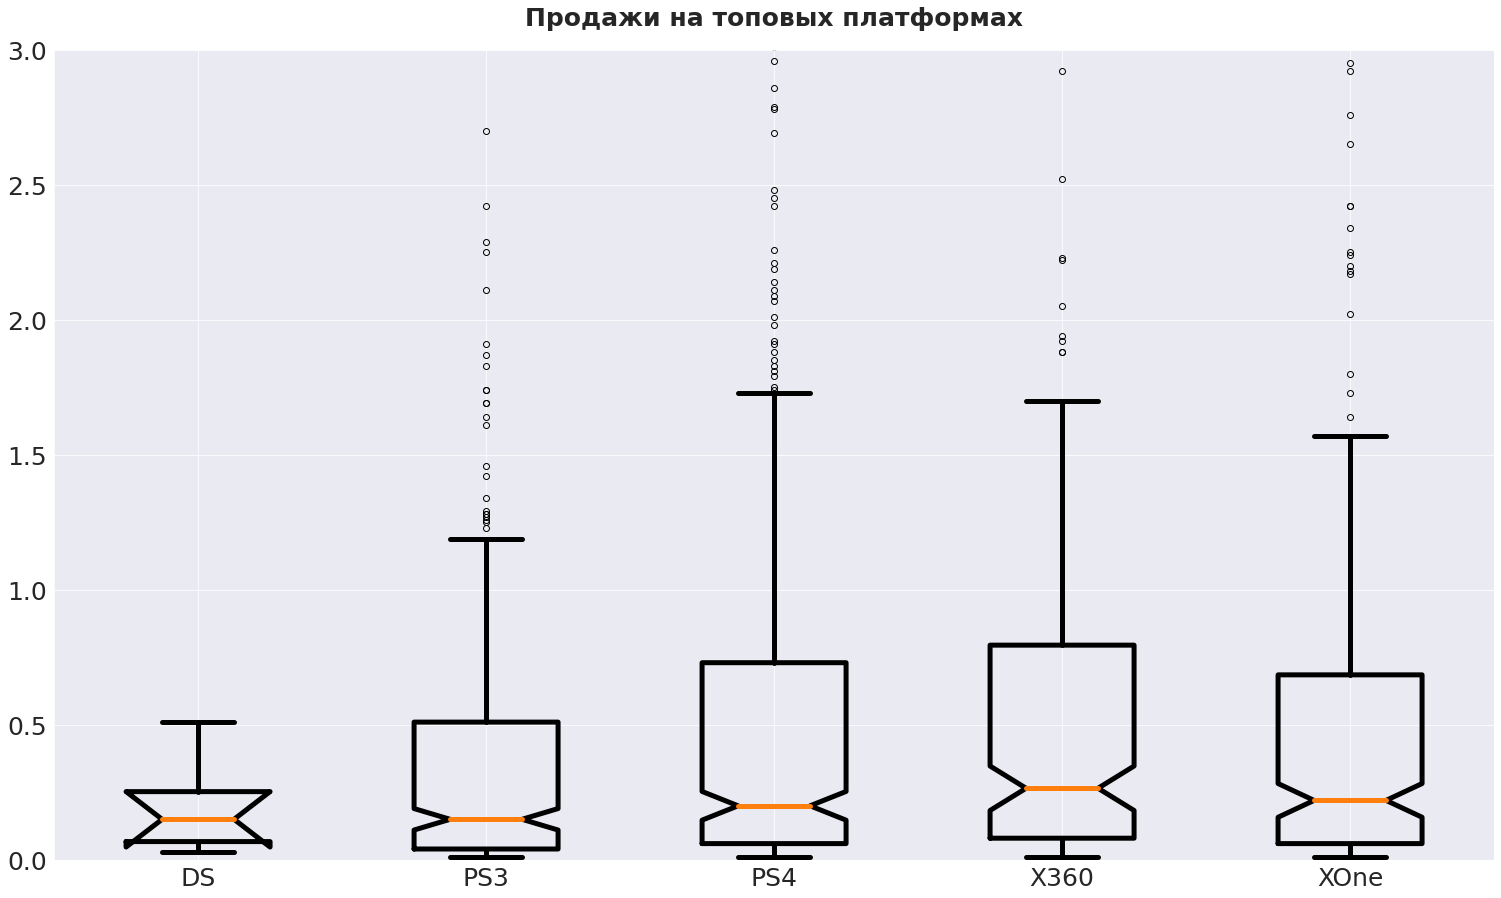

In [22]:
top_platforms = ['PS4', 'X360', 'PS3', 'DS', 'XOne']
df_query = actual_period_data.query('platform in @top_platforms')
by_column = 'platform in @top_platforms'.split()[0]
ax = df_query.boxplot(column='total_sales', by=by_column, fontsize=25, figsize=(25,15),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
ax.set_xlabel('')
ax.set_title('')
ax.set_ylim([0, 3])
plt.suptitle('Продажи на топовых платформах', y=0.94, fontsize=25, fontweight='bold')

In [23]:
print(actual_period_data.query('platform =="DS"')['total_sales'].describe())
print(actual_period_data.query('platform =="PS3"')['total_sales'].describe())
print(actual_period_data.query('platform =="PS4"')['total_sales'].describe())
print(actual_period_data.query('platform =="X360"')['total_sales'].describe())
actual_period_data.query('platform =="XOne"')['total_sales'].describe()

count    8.000000
mean     0.192500
std      0.172026
min      0.030000
25%      0.067500
50%      0.150000
75%      0.252500
max      0.510000
Name: total_sales, dtype: float64
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64
count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64


count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

Разброс наблюдается в каждом из построенных графиков, это связано с тем, что есть очень успешные игры, но такие мало, а вот неуспешных - сотни.

Основные данные:

Средняя выручка за игру на PS4 - 200 тысяч долларов(берем медиану, чтобы выбросы сильно не влияли на результат),  максимум - 14 миллионов долларов.

Средняя выручка за игру на PS3 - 150 тысяч долларов(берем медиану, чтобы выбросы сильно не влияли на результат),  максимум - 21 миллионов долларов.

Средняя выручка за игру на PS4 - 220 тысяч долларов(берем медиану, чтобы выбросы сильно не влияли на результат),  максимум - 7.3 миллионов долларов.

Средняя выручка за игру на PS4 - 265 тысяч долларов(берем медиану, чтобы выбросы сильно не влияли на результат),  максимум - 16 миллионов долларов.

Средняя выручка за игру на PS4 - 90 тысяч долларов(берем медиану, чтобы выбросы сильно не влияли на результат),  максимум - 14.3 миллионов долларов.

0.40656790206178095

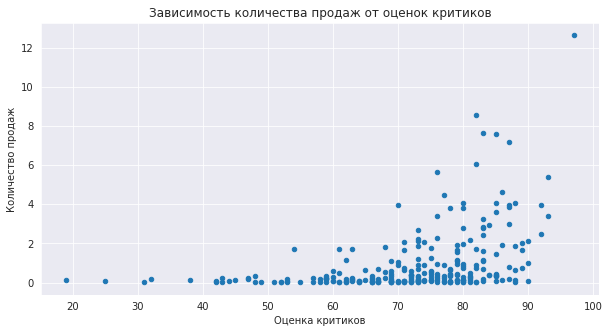

In [24]:
games_ps4_critics = actual_period_data[(actual_period_data['platform'] == 'PS4') & (actual_period_data['critic_score'] > 0)].copy()
games_ps4_critics.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,5), title='Зависимость количества продаж от оценок критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Количество продаж")
games_ps4_critics['critic_score'].corr(games_ps4_critics['total_sales'])

Можно заметить четкую связь между оценкой критиков и успешностью игры. Оно и понятно - чем качественнее игра, тем она более успешна.

-0.031957110204556376

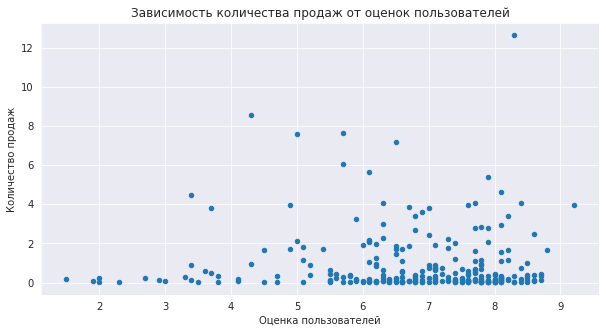

In [25]:
games_ps4_users = actual_period_data[(actual_period_data['platform'] == 'PS4') & (actual_period_data['user_score'] > 0)].copy()
games_ps4_users.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,5), title='Зависимость количества продаж от оценок пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Количество продаж")
games_ps4_users['user_score'].corr(games_ps4_users['total_sales'])

С оценками пользовтелей не все так одназначно, как с критиками, потому что оценка пользователей, хоть и часто, но не всегда отражает раельное качество проекта. Игра может просто не понравиться и пользователь сразу ставит низкую оценку, хотя игра и не так плоха.

PS3 и отзывы критиков - 0.3342853393371919
PS3 и отзывы пользователей - 0.0023944027357566925
XOne и отзывы критиков - 0.4169983280084017
XOne и отзывы пользователей - -0.06892505328279414
X360 и отзывы критиков - 0.3503445460228664
X360 и отзывы пользователей - -0.011742185147181342
3DS и отзывы критиков - 0.3570566142288103
3DS и отзывы пользователей - 0.24150411773563016


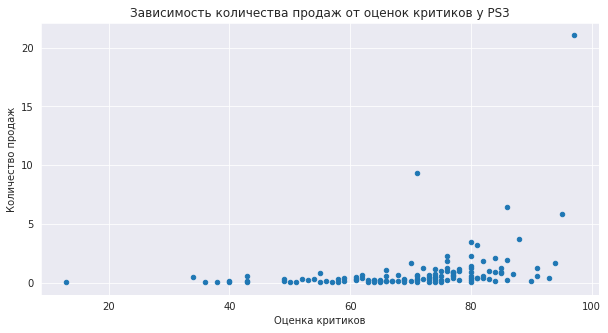

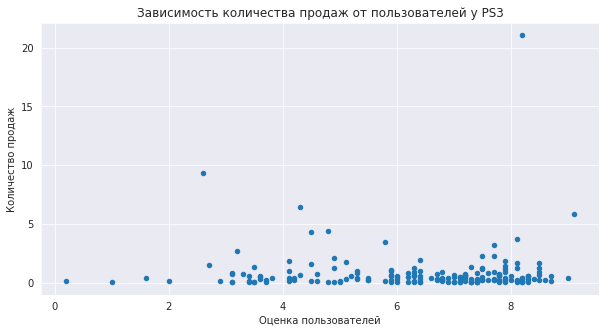

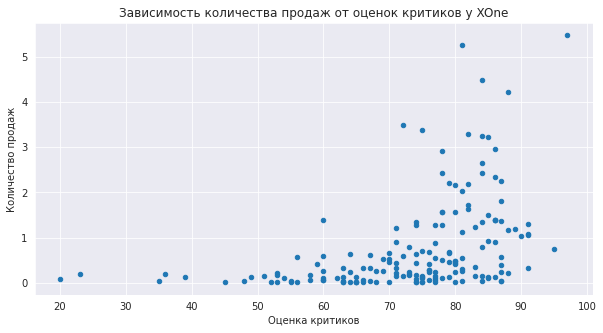

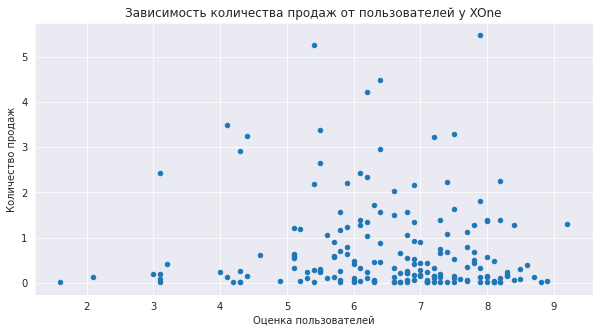

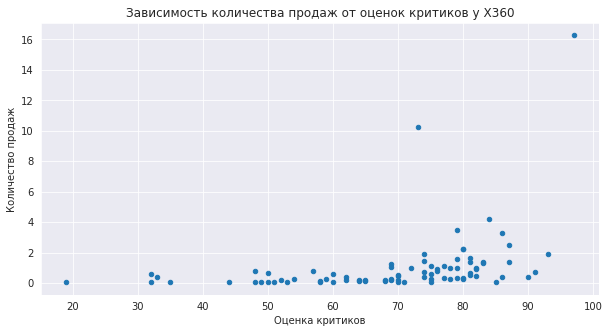

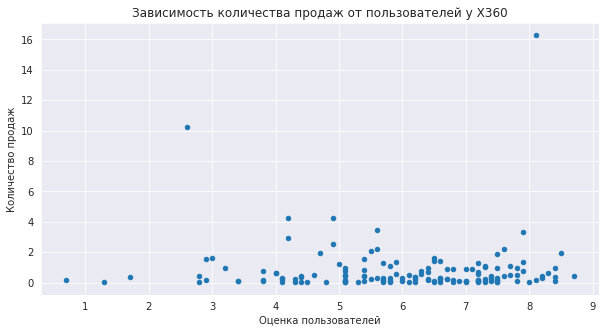

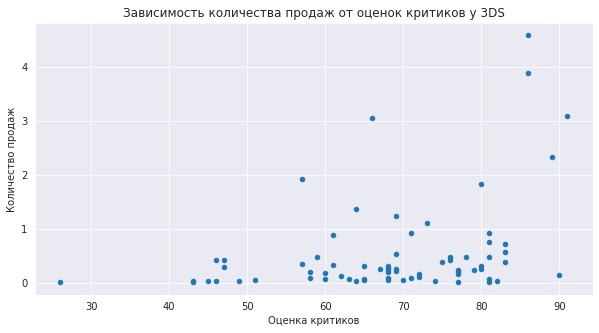

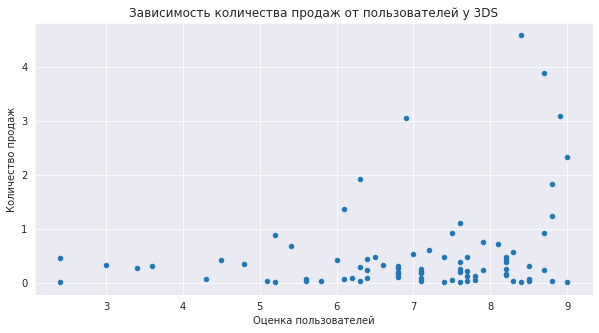

In [26]:
topp_platforms = ['PS3', 'XOne', 'X360', '3DS']
for platform in topp_platforms:
    games_critics = actual_period_data[(actual_period_data['platform'] == platform) & (actual_period_data['critic_score'] > 0)].copy()
    games_users = actual_period_data[(actual_period_data['platform'] == platform) & (actual_period_data['user_score'] > 0)].copy()
    title1 = 'Зависимость количества продаж от оценок критиков у ' + platform
    title2 = 'Зависимость количества продаж от пользователей у ' + platform
    games_critics.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,5), title=title1)
    plt.xlabel("Оценка критиков")
    plt.ylabel("Количество продаж")
    print(platform, 'и отзывы критиков -', games_critics['critic_score'].corr(games_critics['total_sales']))
    games_users.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,5), title=title2)
    print(platform, 'и отзывы пользователей -', games_users['user_score'].corr(games_users['total_sales']))
    plt.xlabel("Оценка пользователей")
    plt.ylabel("Количество продаж")

Рассмотрев корреляцию на других платформах мы видим такую же ситуацию, что и на PS4.

In [27]:
genre_pivot_table = pd.pivot_table(actual_period_data, index='genre', values='total_sales', aggfunc='median')
genre_pivot_table.sort_values('total_sales', ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


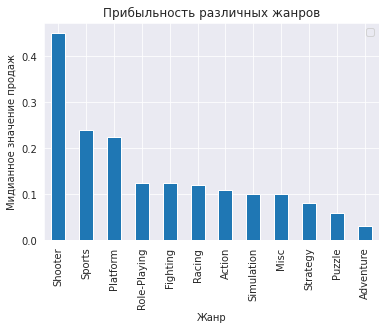

In [28]:
genre_pivot_table.sort_values('total_sales', ascending=False).plot(kind='bar', title='Прибыльность различных жанров')
plt.xlabel("Жанр")
plt.ylabel("Мидианное значение продаж")
plt.legend('')

Самыми прибыльными жанрами можно считать экшн, шутеры, спортивные и ролевые игры. 

Экшн и шутеры зачастую очень динамичные игры целевая аудитория, которых многочисленна.

Спортивные игры в большинстве случаев позволяют играть небольшой компанией, что вызывает заинтересованность и спрос.

Ролевые игры зачастую привлекают своей атмосферностью и хардкором.

У остальных игр также присутсвует целевая аудитория, но она не так велика как у вышеперечисленных жанров.

**Вывод:**

Были выделены и проанализированы самые актуальные платформы и временной промежуток. Для этих параметров были рассмотрены различные зависимость и было выяснено:

1) Средняя продолжительность "жизни" платформы - 7-10 лет

2) Самыми актуальными и перспективными платформами являются - PS4, PS3, XOne, X360 и 3DS.

3) Средняя и максимальная выручка каждой платформы.

4) Успешность проектов на каждой платформе сильно коррелирует с оценками критиков и в меньшей степени с оценками пользователей.

5) Самыми прибыльными жанрами можно считать экшн, шутеры, спортивные и ролевые игры.

<h3>4. Составление портрета пользователя каждого региона<a class="tocSkip"><.h3>

In [29]:
# код ревьюера
pd.pivot_table(actual_period_data, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


,na_sales
platform,
X360,0.150
XOne,0.120
WiiU,0.090
PS4,0.060
Wii,0.040
PS3,0.030
DS,0.015
3DS,0.000
PC,0.000


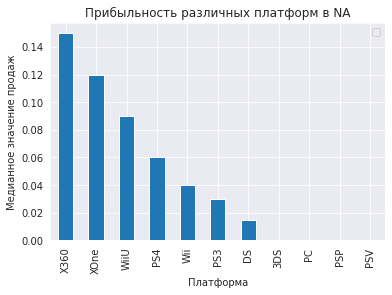

In [30]:
na = pd.pivot_table(actual_period_data, index='platform', values='na_sales',
                                        aggfunc='median').sort_values('na_sales', ascending=False)
na.sort_values('na_sales', ascending=False).plot(kind='bar', title='Прибыльность различных платформ в NA')
plt.xlabel("Платформа")
plt.ylabel("Медианное значение продаж")
plt.legend('')
na

,eu_sales
platform,
Wii,0.100
DS,0.095
PS4,0.080
X360,0.080
WiiU,0.070
XOne,0.070
PC,0.060
PS3,0.020
3DS,0.000


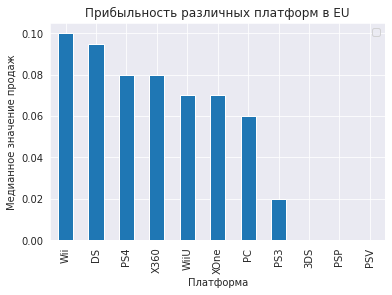

In [31]:
eu = pd.pivot_table(actual_period_data, index='platform', values='eu_sales',
                                        aggfunc='median').sort_values('eu_sales', ascending=False)
eu.sort_values('eu_sales', ascending=False).plot(kind='bar', title='Прибыльность различных платформ в EU')
plt.xlabel("Платформа")
plt.ylabel("Медианное значение продаж")
plt.legend('')
eu

,jp_sales
platform,
3DS,0.06
PS3,0.03
PSV,0.03
PSP,0.02
PS4,0.01
DS,0.00
PC,0.00
Wii,0.00
WiiU,0.00


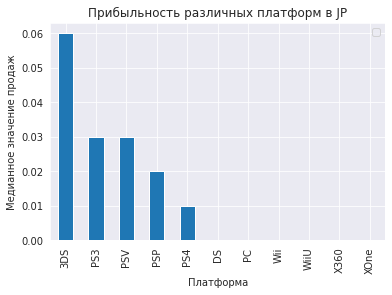

In [32]:
jp = pd.pivot_table(actual_period_data, index='platform', values='jp_sales',
                                        aggfunc='median').sort_values('jp_sales', ascending=False)
jp.sort_values('jp_sales', ascending=False).plot(kind='bar', title='Прибыльность различных платформ в JP')
plt.xlabel("Платформа")
plt.ylabel("Медианное значение продаж")
plt.legend('')
jp

Топ 5 платформ по регионам:

**North America** - PS4, XOne, X360, PS3 и 3DS.

**Europe** - Wii, PS4, DS, X360 и WiiU.

**Japan** - 3DS, PS3, PSV, PS4 и PSP.

В Америке самыми прибыльными являются консоли линейки от Microsoft XOne и X360. Возможно это связано с расположением Microsoft в этом регионе. В Европе первые места занимают Wii, DS и PS4, а в Японии вне конкуренции платформа 3DS, а PS3 и PSV примерно на одном уровне.

,na_sales
genre,
Shooter,0.200
Platform,0.090
Sports,0.080
Fighting,0.045
Racing,0.030
Action,0.020
Role-Playing,0.020
Misc,0.010
Adventure,0.000


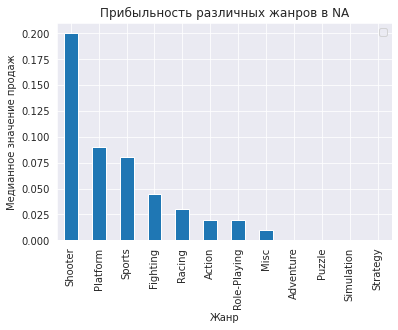

In [33]:
na_genre = pd.pivot_table(actual_period_data, index='genre', values='na_sales',
                                        aggfunc='median').sort_values('na_sales', ascending=False)
na_genre.sort_values('na_sales', ascending=False).plot(kind='bar', title='Прибыльность различных жанров в NA')
plt.xlabel("Жанр")
plt.ylabel("Медианное значение продаж")
plt.legend('')
na_genre

,eu_sales
genre,
Shooter,0.190
Platform,0.080
Racing,0.060
Sports,0.050
Simulation,0.035
Strategy,0.025
Action,0.020
Fighting,0.020
Misc,0.010


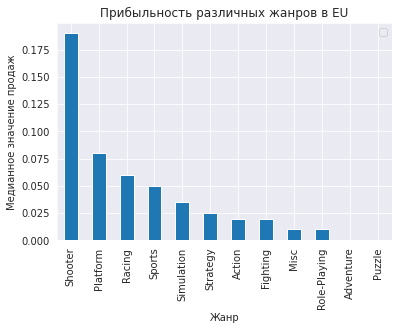

In [35]:
eu_genre = pd.pivot_table(actual_period_data, index='genre', values='eu_sales',
                                        aggfunc='median').sort_values('eu_sales', ascending=False)
eu_genre.sort_values('eu_sales', ascending=False).plot(kind='bar', title='Прибыльность различных жанров в EU')
plt.xlabel("Жанр")
plt.ylabel("Медианное значение продаж")
plt.legend('')
eu_genre

,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Misc,0.02
Puzzle,0.02
Action,0.01
Adventure,0.01
Platform,0.00
Racing,0.00
Shooter,0.00


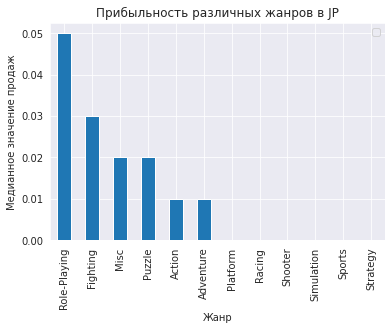

In [36]:
jp_genre = pd.pivot_table(actual_period_data, index='genre', values='jp_sales',
                                        aggfunc='median').sort_values('jp_sales', ascending=False)
jp_genre.sort_values('jp_sales', ascending=False).plot(kind='bar', title='Прибыльность различных жанров в JP')
plt.xlabel("Жанр")
plt.ylabel("Медианное значение продаж")
plt.legend('')
jp_genre

**North America** - Shooter, Platform, Sports, Fighting, Racing.

**Europe** - Shooter, Platform, Racing, Sports, Misc.

**Japan** - Puzzle, Role-Playing, Sports, Action, Misc, Strategy.

В Северной Америке и Европе различия незначительны первые четыре позиции одинаковы. Это неудивительно, ведь различия в менталитете европейцев и североамериканцев невелики. Совсем другая ситуация в Японии, там предпочтения сильно отличаются. 

In [37]:
na_rating_pivot_table = pd.pivot_table(actual_period_data, index='rating', values='na_sales',
                                        aggfunc='median').sort_values('na_sales', ascending=False)
na_rating_pivot_table

,na_sales
rating,
M,0.14
E10+,0.12
E,0.05
T,0.04


In [38]:
eu_rating_pivot_table = pd.pivot_table(actual_period_data, index='rating', values='eu_sales',
                                        aggfunc='median').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

,eu_sales
rating,
M,0.130
E10+,0.100
E,0.055
T,0.040


In [39]:
jp_rating_pivot_table = pd.pivot_table(actual_period_data, index='rating', values='jp_sales',
                                        aggfunc='median').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

,jp_sales
rating,
T,0.01
E,0.00
E10+,0.00
M,0.00


В Северной Америке и Европе популярны игры для взрослых, тогда как в Японии самый популрный возврастной рейтинг - 13+.

**Вывод:**

Мы провели анализ различных регионов по параметрам - платформа, жанр и возрастной рейтинг. В результате исследования можно составить психологический портрет пользователя из каждого региона.

**Северная Америка:** Игрок возрастом от 17 лет играет на XOne или X360, любит шутеры, спортивные игры и файтинги.

**Европа:** Игрок возрастом от 17 лет играет на PS4, любит шутеры, спортивные игры или гонки.

**Япония:** Игрок возрастом от 13 лет играет на 3DS и PS3, любит ролевые игры и пазлы.

<h3>5. Проверка гипотез<a class="tocSkip"><.h3>

1)**Нулевая гипотеза** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза** - средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [40]:
alpha = 0.05
results = st.ttest_ind(actual_period_data[(actual_period_data['platform'] == 'XOne') & (actual_period_data['user_score'] > 0)]['user_score'],
        actual_period_data[(actual_period_data['platform'] == 'PC') & (actual_period_data['user_score'] > 0)]['user_score'], alternative='two-sided')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14012658403611647
Нет оснований отвергнуть нулевую гипотезу


Мы не отвергаем нулевую гипотезу, а значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые при пороговом значении 0.05.

2)**Нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза** - средние пользовательские рейтинги жанров Action и Sports отличаются.

In [ ]:
alpha = 0.05
results = st.ttest_ind(actual_period_data[(actual_period_data['genre'] == 'Action') & (actual_period_data['user_score'] > 0)]['user_score'],
        actual_period_data[(actual_period_data['genre'] == 'Sports') & (actual_period_data['user_score'] > 0)]['user_score'], alternative='two-sided')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Мы отвергаем нулевую гипотезу, а значит средние пользовательские рейтинги жанров Action и Sports отличаются при пороговом значении 0.05.

<h3>6. Общий вывод<a class="tocSkip"><.h3>

Для анализы работы интернет-магазина "Стримчик" были взяты данные из открытых источников. При первичном анализе были замечены проблемы - пропуски, неправильно записанные названия столбцов, столбцы не правильным типом данных, непонятные tbd в столбце с отзывами пользователей 

В разделе **предобработки** были ликвидированы ошибки в названиях столбцов и в типах данных. Было выяснено, что tbd это To Be Determind, и то, что мы можем заменить их на NaN.

В разделе **исследовательского анализа данных** было выяснено:

1) Средняя продолжительность "жизни" платформы - 7-10 лет

2) Самыми актуальными и перспективными платформами являются - PS4, PS3, XOne, X360 и 3DS.

3) Средняя и максимальная выручка каждой платформы.

4) Успешность проектов на каждой платформе сильно коррелирует с оценками критиков и в меньшей степени с оценками пользователей.

5) Самыми прибыльными жанрами можно считать экшн, шутеры, спортивные и ролевые игры.

В следующем разделе был составлен портрет пользователя из Америки, Европы и Японии:

**Северная Америка:** Игрок возрастом от 17 лет играет на XOne или X360, любит шутеры, спортивные игры и файтинги.

**Европа:** Игрок возрастом от 17 лет играет на PS4, любит шутеры, спортивные игры или гонки.

**Япония:** Игрок возрастом от 13 лет играет на 3DS и PS3, любит ролевые игры и пазлы.

В разделе **проверки гипотез** были протестированы следующие гипотезы:

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** Данная гипотеза не была отвергнута при пороговом значении 0.05.

**Средние пользовательские рейтинги жанров Action и Sports одинаковые.** Данная гипотеза была отвергнута при пороговом значении 0.05.

В результате данного исследования можно дать следующие рекомендации отделу маркетинга для проведения рекламной компании в 2017 году: 

1) В каждом регионе в качестве популярной и актуальной платформы фигурирует PS4. Эта платформа еще не достигла пика своей популярности, ее актуальность будет только расти. Сейчас разработчики полностью подстроились под разработку игр на эту перспективную платформу, поэтому в грядущем году можно ожидать громких релизов. В Американском регионе преобладают платформы компании Microsoft.

2) В двух крупных регионах(Америка и Европа) самым популярным жанром являются шутеры. Именно в этом жанре стоит ожидать выхода успешных игр. Также стоит обратить внимание на спортивные игры, успешность которых во многом объясняется возможностью играть компанией на одном устройстве, что во часто гарантирует успех продукта. Если говорить только о Японии, то там преобладают неспешные игры по типу пазлов, также стоит обратить внимание на ролевые игры.

3) Вероятным возрастным ограничением у хита будет 17+.
